####  **Load data**

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


#### **Visualization**

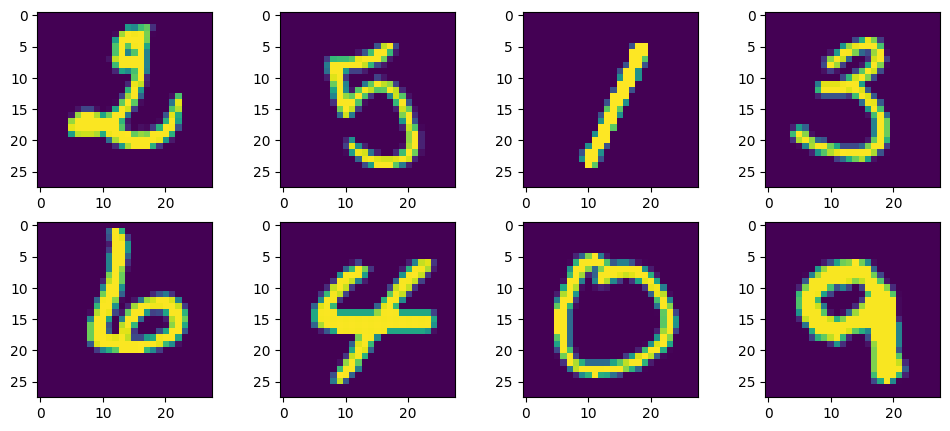

In [2]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12,5))
for i in range(8):
  index = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[index])

#### **Preprocessing data**

In [3]:
from tensorflow.keras.utils import to_categorical

# convert 28x28 images into 784 vector
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalization
X_train = X_train/255.0
X_test_norm = X_test/255.0

# One-hot encoding label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### **Model Initialization**

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy

class ANN():
    def __init__(self, num_epoch, batch_size, learning_rate, validation_split):
        self.num_epoch = num_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.validation_split = validation_split
        return None

    def build(self):
        self.model = Sequential()
        self.model.add(Dense(128, input_shape = (784,), activation = 'relu'))
        self.model.add(Dense(64, activation = 'relu'))
        self.model.add(Dense(32, activation = 'relu'))
        self.model.add(Dense(10, activation = 'softmax'))
        opt = SGD(learning_rate = self.learning_rate)
        self.model.compile(loss = CategoricalCrossentropy(), optimizer = opt, metrics = ['accuracy'])

        return None

    def train(self, X_train, y_train):
        history = self.model.fit(X_train, y_train, validation_split=self.validation_split, epochs = self.num_epoch, batch_size = self.batch_size)
        return None

    def save(self):
        self.model.save_weights('ann_model.weights.h5')
        return None

    def load(self):
        self.model.load_weights('ann_model.weights.h5')
        return None

    def summary(self):
        self.model.summary()
        return None

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        return y_pred

#### **Training model**

In [5]:
main_model = ANN(num_epoch=10, batch_size=64, learning_rate=0.01, validation_split=0.2)
main_model.build()
main_model.summary()
main_model.train(X_train, y_train)

d:\Miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5042 - loss: 1.5964 - val_accuracy: 0.8744 - val_loss: 0.4629
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8727 - loss: 0.4510 - val_accuracy: 0.9056 - val_loss: 0.3259
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9032 - loss: 0.3406 - val_accuracy: 0.9188 - val_loss: 0.2809
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9147 - loss: 0.2935 - val_accuracy: 0.9266 - val_loss: 0.2501
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9245 - loss: 0.2561 - val_accuracy: 0.9326 - val_loss: 0.2278
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9332 - loss: 0.2326 - val_accuracy: 0.9367 - val_loss: 0.2118
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9397 - loss: 0.2100 - val_accuracy: 0.9432 - val_loss: 0.1976
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9435 - loss: 0.1965 - val_accuracy: 0.

#### **Evaluation**

In [6]:
main_model.save()
y_pred = main_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [7]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.92      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.96      0.94      0.95       982
           5       0.97      0.90      0.93       892
           6       0.96      0.96      0.96       958
           7       0.97      0.91      0.94      1028
           8       0.89      0.97      0.93       974
           9       0.90      0.95      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



#### **Train and Evaluate Softmax Regression**

In [8]:
from sklearn.linear_model import LogisticRegression

softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
softmax_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred = softmax_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

d:\Miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.99      0.88      0.93      1135
           2       0.96      0.83      0.89      1032
           3       0.84      0.91      0.87      1010
           4       0.96      0.88      0.92       982
           5       1.00      0.42      0.59       892
           6       0.93      0.96      0.95       958
           7       0.97      0.83      0.90      1028
           8       0.54      0.96      0.70       974
           9       0.85      0.92      0.88      1009

    accuracy                           0.86     10000
   macro avg       0.90      0.86      0.86     10000
weighted avg       0.90      0.86      0.86     10000

